## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [8]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#read CSV files
google_playstore_data = pd.read_csv('/content/drive/MyDrive/ Play Store Data.csv')
review = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [11]:
google_playstore_data.shape

(10841, 13)

In [12]:
google_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
review.shape

(64295, 5)

In [14]:
review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [15]:
#Now before moving ahead most important part is to remove rows with null values
google_playstore_data = google_playstore_data.dropna(how='any')
review= review.dropna(how='any')

In [16]:
 google_playstore_data.shape

(9360, 13)

In [17]:
#rows with null values is removed now 
#earlier we have 10841 rows now only 9360 left 


In [18]:
#1481 rows contains null values which are removed

In [19]:
google_playstore_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
google_playstore_data.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [21]:
review.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [22]:
review.tail(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.0
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.4


In [76]:
print(installs)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object


In [23]:
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
google_playstore_data.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

google_playstore_data["Size(Mb)"]=google_playstore_data["Size(Mb)"].map(lambda x: format(x))
 
google_playstore_data["Size(Mb)"]=google_playstore_data["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [24]:
total = google_playstore_data.shape[0]
unique=len(google_playstore_data['App'].unique())
duplicate=total-unique
print('total number of apps in play store data is:',total)
print('total number of unique apps in playstore data is:',unique)
print('total number of duplicate apps in playstore is:',duplicate)

total number of apps in play store data is: 9360
total number of unique apps in playstore data is: 8190
total number of duplicate apps in playstore is: 1170


In [25]:
# replace "$" 
google_playstore_data["Price"]=google_playstore_data["Price"].str.replace("$","")
# replace  "+" and "," it with an empty string
google_playstore_data["Installs"]=google_playstore_data["Installs"].str.replace("+","").str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [26]:
# Change the data type to float
google_playstore_data["Reviews"]=pd.to_numeric(google_playstore_data["Reviews"])
google_playstore_data["Installs"]=google_playstore_data["Installs"].astype(float)
google_playstore_data["Price"]=google_playstore_data["Price"].astype(float)
google_playstore_data["Size(Mb)"]=google_playstore_data["Size(Mb)"].astype(float)

Now first lets remove + and , from number of installs

Graphical Representation of data

In [153]:
install=google_playstore_data["Installs"]
print(install)

0           10000
1            1000
2            1000
3            1000
4            1000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object


In [29]:
rating = google_playstore_data['Rating']
reviews= google_playstore_data['Reviews']

We are going to see impact of Positive and Negative reviews on number of installation

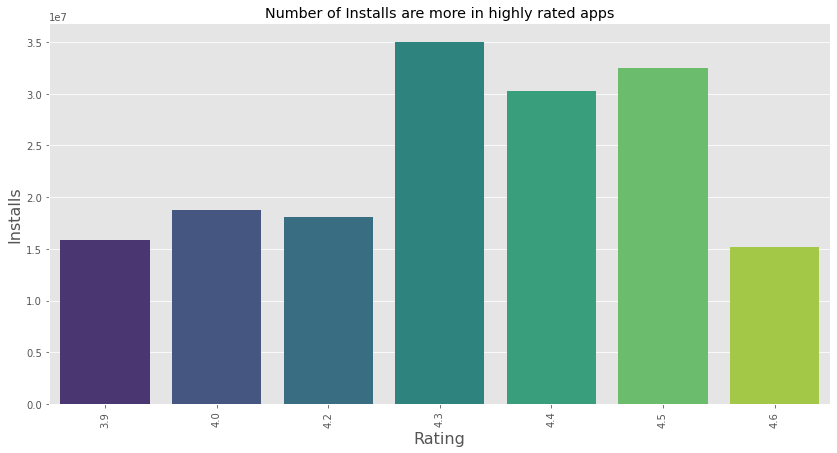

In [30]:
A=(google_playstore_data.groupby("Rating").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False).reset_index().head(7))
B=pd.DataFrame(A)
plt.figure(figsize=(14,7))
plt.style.use("ggplot")
sns.barplot(y="Installs",x="Rating",data=B,palette="viridis")
plt.xlabel("Rating", fontsize=16)
plt.ylabel("Installs", fontsize=16)
plt.title("Number of Installs are more in highly rated apps")
plt.xticks(rotation=90)
plt.show();

Impact of rating on install

In [31]:
#Apps with positive rating have more number of downloads


Let's see which category had maximum
 numbers of applications

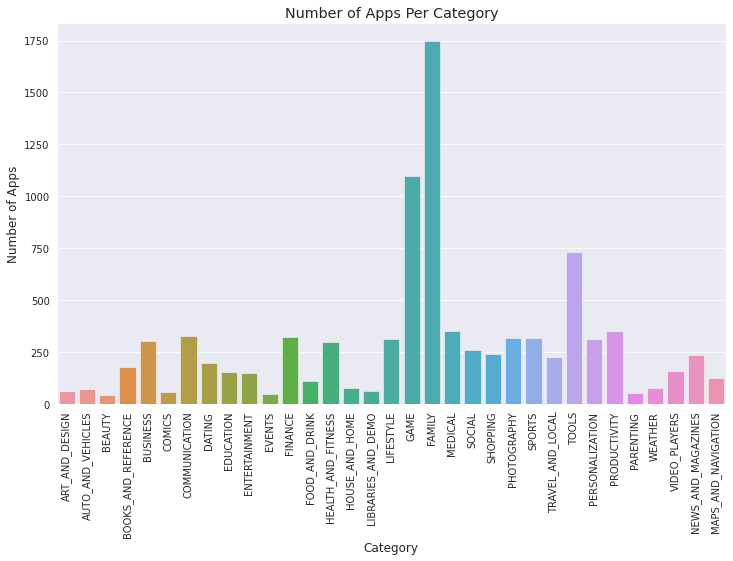

In [33]:
#code to see max number of applications 
sns.set_style('darkgrid')
plt.figure(figsize=(12, 7))
sns.countplot(x='Category', data=google_playstore_data)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [34]:
#family category has maximum numbers of apps followed by games and tools 

Now lets see which category has more number of downloads

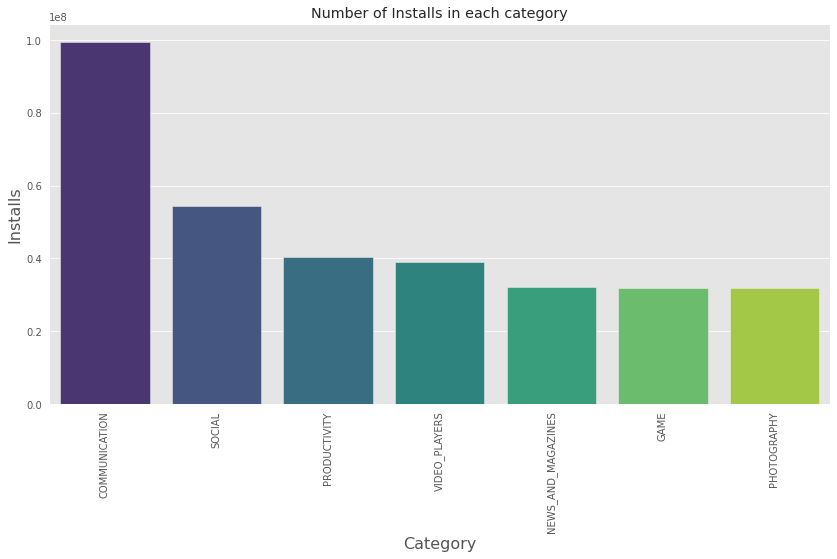

In [35]:
A=(google_playstore_data.groupby("Category").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False).reset_index().head(7))
B=pd.DataFrame(A)
plt.figure(figsize=(14,7))
plt.style.use("ggplot")
sns.barplot(y="Installs",x="Category",data=B,palette="viridis")
plt.xlabel("Category", fontsize=16)
plt.ylabel("Installs", fontsize=16)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();

Peoples installed maximum number of applications from Communication category and after that from Social category


Conclusion of above 2 graph 
 
  maximum numbers of apps are present in  family category and after that in games category and then on 3rd tools category but maximum number of installation are not from any of these category , Communication category has maximum numbers of installation .
  So we can conclude here that how many numbers of apps that are present in particular category does not had any impact on numbers of download.

We are now going to see another category comparision free vs paid category.

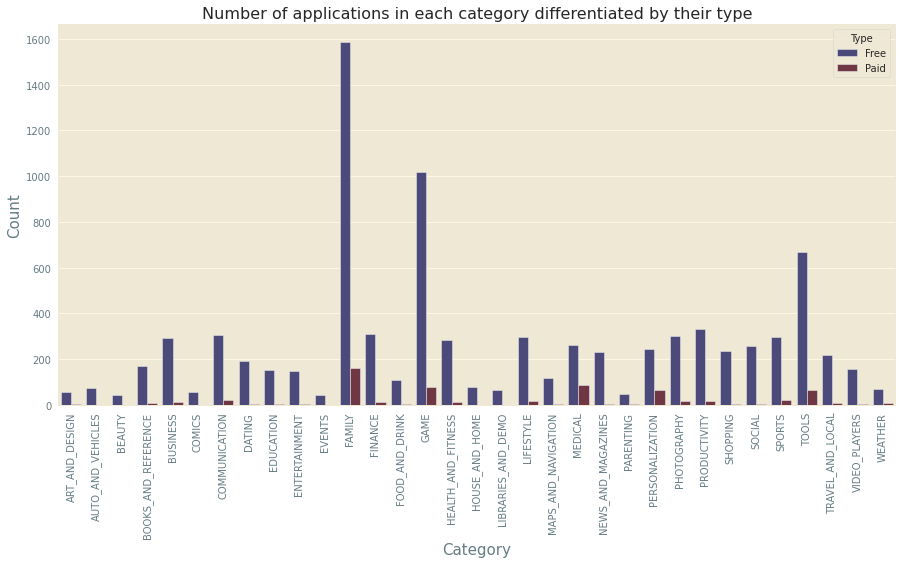

In [36]:
Data=google_playstore_data.groupby(["Category","Type"])["App"].count().reset_index()
ds2=pd.DataFrame(Data)
#Free vs Paid apps
plt.figure(figsize=(15,7))
plt.style.use("Solarize_Light2")
sns.barplot(x="Category",y="App",hue="Type",data=ds2,palette="icefire")
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

In [37]:
#Clearly we can see that in every category paid app are very very less.

Most numbers of paid apps are present in family category and after that in medical and game category, but still its count is very less because numbers of free apps are very very high in front of paid apps

So from above free vs paid graph we can easily conclude that Maximum numbers of downloads are from free category because in every category presence of paid apps are very less and as we know that android alows users to install apps from other sites also so maximun users used to install paid apps for free from other sites if they want to use it.

In [38]:
#Impact of app size on installation 

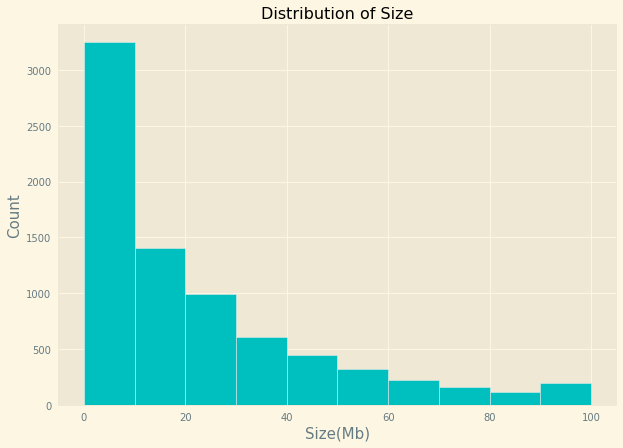

In [39]:
plt.figure(figsize=(10,7))
plt.style.use("Solarize_Light2")
plt.hist(google_playstore_data['Size(Mb)'],color="c")
plt.xlabel("Size(Mb)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution of Size",color = "black")
plt.show();

From the above graph we can clearly see that smaller sized apps are more in number

In [40]:
#Now lets see that size impact download or not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


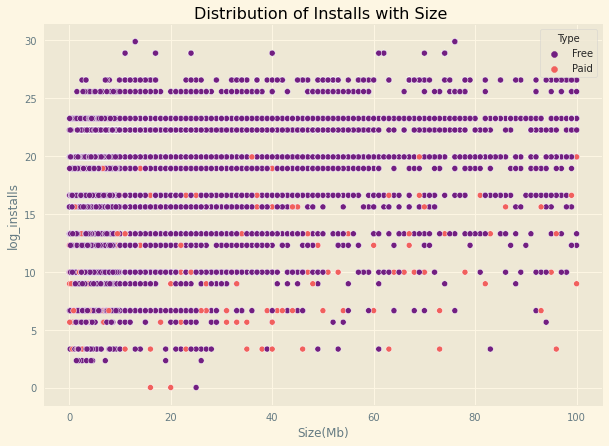

In [41]:
google_playstore_data['log_installs'] = np.log2(google_playstore_data['Installs'])
# Scatter-plot
plt.figure(figsize=(10,7))
plt.style.use("Solarize_Light2")
sns.scatterplot(google_playstore_data['Size(Mb)'],google_playstore_data['log_installs'],hue=google_playstore_data["Type"],palette="magma")
plt.title("Distribution of Installs with Size ",color = "black")
plt.show();

In [42]:
#smaller sized and free apps are downloded more we can clearly see that

Here we can conclude that more numbers of smallersized apps are present on playstore and number of downloads are also more of small sized apps.

In [43]:
#NOw lets analyse Reviews 

We are going to see more numbers of reviews that are present on playstore are positive or negative or neutral

In [44]:
review.tail(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.0
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.4


In [45]:
merged = google_playstore_data.merge(review, on="App")

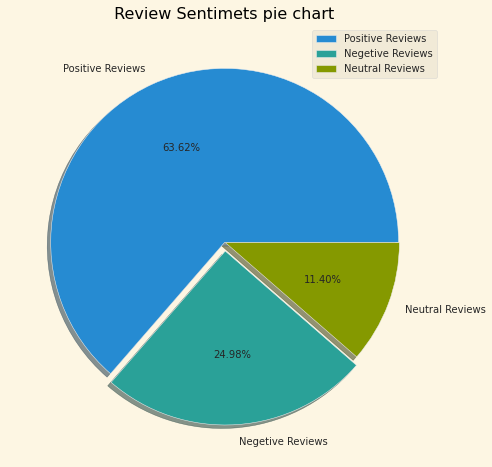

In [46]:
add = list(merged['Sentiment'].value_counts())
lab = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(add, labels=lab, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title(' Review Sentimets pie chart ', color = "black")
plt.axis('off')
plt.legend()
plt.show()

We can clearly see that most of the reviews that users give on google play store is posive and only 24.98% reviews are negative whereas 11.40 % peoples had also given neutral reviews

**Conclusion**
  We had analysed both google playtore data and reviews , in google playstore data we had analysed that good User rating , small size , free apps are positively impacting number of installation . whereas paid apps , negative user review and larger app size are adversly impacting number of installation . 
  we had also seen that maximum number of apps that are present on play store is free of cost.
    quantity does not affect download we had also seen that because maximum numbers of apps are present in Family category after that in game category and after that in tools category but Maximum number of installation are from communication and social category .
    We had also analysed user review and after analysing it we can clearly say that maximum number of peoples are happy with apps that are present on playstore because around 66% reviews are positive and only around 25% negative reviews are given while 11% neutral reviews are also present.